In [15]:
import numpy as np
from numpy.ma.core import shape

from swinArm.datamodule import vocab
from swinArm.lit_swinPreArm import LitSwinPreARM
from torchvision.transforms import ToTensor, Normalize, Resize, Compose
import torch
from PIL import Image
from IPython.display import display

In [71]:
ckpt = '../checkpoint/epoch=103-val_loss=0.27032342553138733-step=260051-val_ExpRate=0.5215.ckpt'

In [72]:
comp = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    Resize((224, 224)),
])

In [73]:
model = LitSwinPreARM.load_from_checkpoint(ckpt)
model = model.eval()
device = torch.device("cpu")
model = model.to(device)

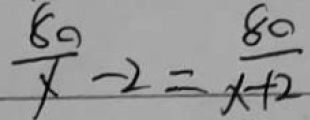

In [86]:
img = Image.open('test_10011.bmp').convert('RGB')
display(img)

In [81]:
img = np.array(img)

In [87]:
img = comp(img)
mask = torch.zeros_like(img[-1,:,:], dtype=torch.bool)
hyp = model.approximate_joint_search(img.unsqueeze(0), 
                                     mask.unsqueeze(0))[0]
pred_latex = vocab.indices2label(hyp.seq)

In [88]:
print(pred_latex)

\frac { 6 0 } { x } - 2 = \frac { 8 0 } { x + 2 }
